In [2]:
import pandas as pd

df = pd.read_csv(
    "../../data/lc_small.csv",
    usecols=[
        "loan_status",
        "purpose",
        "home_ownership",
        "annual_inc",
        "verification_status",
        "dti",
    ],
)

df.dropna(inplace=True)  # Eliminate missing data
print(df.shape, "\n")
df.loan_status.value_counts() / df.shape[0]

(10466, 6) 



loan_status
Current               0.630805
Fully Paid            0.260080
Charged Off           0.085802
Late (31-120 days)    0.014523
In Grace Period       0.005351
Late (16-30 days)     0.003440
Name: count, dtype: float64

# Data Preparation

In [3]:
# Check for missing data

print(df.isna().sum(), "\n")
# df.loc[df["loan_status"] == "Fully Paid", ["loan_status"]] = 'Current'
# # df.loc[df["loan_status"] == "Late (31-120 days)", ["loan_status"]] = "Late"
# # df.loc[df["loan_status"] == "Late (16-30 days)", ["loan_status"]] = "Late"
# # df.loc[df["loan_status"] == "In Grace Period", ["loan_status"]] = "Late"
# # df.loc[df["loan_status"] == "Charged Off", ["loan_status"]] = "Late"

# df = df.loc[df["loan_status"].isin(["Current", "Charged Off"])]

loan_status            0
purpose                0
home_ownership         0
annual_inc             0
verification_status    0
dti                    0
dtype: int64 



# Modeling

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

y = df.loan_status
y = LabelEncoder().fit_transform(y)
X = df.drop("loan_status", axis=1)

X = pd.get_dummies(X, drop_first=True, dtype='int64')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)
X_train.shape
y_train
X_test

,annual_inc,dti,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified
3749,54000.0,32.00,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
7740,36000.0,22.07,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3617,45000.0,23.76,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
8601,55000.0,13.48,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3908,92000.0,29.98,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6061,125000.0,38.96,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
5709,68200.0,19.62,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
4716,90000.0,5.08,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
8239,125000.0,22.11,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [5]:
from xgboost import XGBClassifier



model = XGBClassifier().fit(X_train, y_train)

print(model.score(X_test, y_test))

0.5955414012738853


# Evaluation

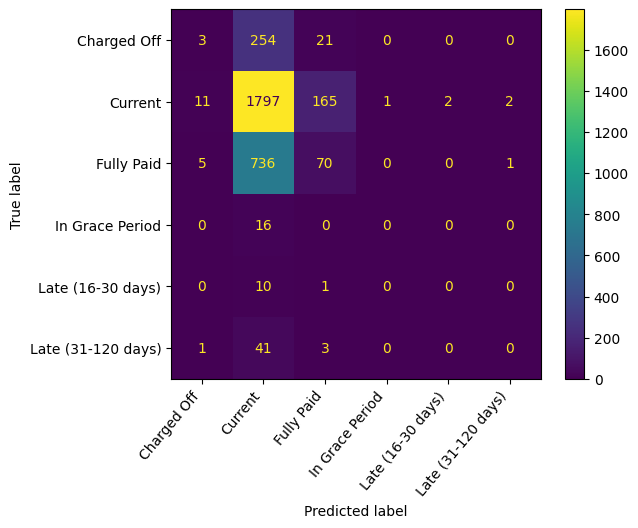

In [6]:
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np

y_pred = model.predict(X_test)

labels = df.loan_status.sort_values().unique()

cm = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(cm, display_labels=labels)
cm_display.plot(values_format="d")
plt.xticks(rotation=50, ha="right")
plt.show()

In [7]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=labels))

                    precision    recall  f1-score   support

       Charged Off       0.15      0.01      0.02       278
           Current       0.63      0.91      0.74      1978
        Fully Paid       0.27      0.09      0.13       812
   In Grace Period       0.00      0.00      0.00        16
 Late (16-30 days)       0.00      0.00      0.00        11
Late (31-120 days)       0.00      0.00      0.00        45

          accuracy                           0.60      3140
         macro avg       0.17      0.17      0.15      3140
      weighted avg       0.48      0.60      0.50      3140

